# Sengoku Nadeko < 3

$$\left(-\frac{b}{2a} , c - \frac{b^2}{4a} \right)$$ 

In [1]:
df<-read.csv("Car accidents.csv")
str(df)

'data.frame':	26217 obs. of  16 variables:
 $ X          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dvcat      : Factor w/ 5 levels "1-9km/h","10-24",..: 3 2 2 3 3 4 5 5 2 2 ...
 $ weight     : num  25.1 25.1 32.4 495.4 25.1 ...
 $ dead       : Factor w/ 2 levels "alive","dead": 1 1 1 1 1 1 1 2 1 1 ...
 $ airbag     : Factor w/ 2 levels "airbag","none": 2 1 2 1 2 2 2 2 2 2 ...
 $ seatbelt   : Factor w/ 2 levels "belted","none": 1 1 2 1 1 1 1 2 1 1 ...
 $ frontal    : int  1 1 1 1 1 1 1 1 0 1 ...
 $ sex        : Factor w/ 2 levels "f","m": 1 1 1 1 1 1 2 2 2 1 ...
 $ ageOFocc   : int  26 72 69 53 32 22 22 32 40 18 ...
 $ yearacc    : int  1997 1997 1997 1997 1997 1997 1997 1997 1997 1997 ...
 $ yearVeh    : int  1990 1995 1988 1995 1988 1985 1984 1987 1984 1987 ...
 $ abcat      : Factor w/ 3 levels "deploy","nodeploy",..: 3 1 3 1 3 3 3 3 3 3 ...
 $ occRole    : Factor w/ 2 levels "driver","pass": 1 1 1 1 1 1 1 1 1 1 ...
 $ deploy     : int  0 1 0 1 0 0 0 0 0 0 ...
 $ injSeverity: int  3 1 4 1 3

In [2]:
summary(df)

       X             dvcat           weight            dead      
 Min.   :    1   1-9km/h:  686   Min.   :    0.00   alive:25037  
 1st Qu.: 6555   10-24  :12848   1st Qu.:   32.47   dead : 1180  
 Median :13109   25-39  : 8214   Median :   86.99                
 Mean   :13109   40-54  : 2977   Mean   :  462.81                
 3rd Qu.:19663   55+    : 1492   3rd Qu.:  364.72                
 Max.   :26217                   Max.   :57871.59                
                                                                 
    airbag        seatbelt        frontal       sex          ageOFocc    
 airbag:14419   belted:18573   Min.   :0.0000   f:12248   Min.   :16.00  
 none  :11798   none  : 7644   1st Qu.:0.0000   m:13969   1st Qu.:22.00  
                               Median :1.0000             Median :33.00  
                               Mean   :0.6433             Mean   :37.21  
                               3rd Qu.:1.0000             3rd Qu.:48.00  
                            

In [3]:
library(gmodels)
ctt<-CrossTable(df$injSeverity,df$airbag)$t
ctt<-as.data.frame.matrix(ctt)
library(ggplot2)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  26064 

 
               | df$airbag 
df$injSeverity |    airbag |      none | Row Total | 
---------------|-----------|-----------|-----------|
             0 |      3772 |      2707 |      6479 | 
               |    12.151 |    14.856 |           | 
               |     0.582 |     0.418 |     0.249 | 
               |     0.263 |     0.231 |           | 
               |     0.145 |     0.104 |           | 
---------------|-----------|-----------|-----------|
             1 |      3333 |      2262 |      5595 | 
               |    21.189 |    25.904 |           | 
               |     0.596 |     0.404 |     0.215 | 
               |     0.232 |     0.193 |           | 
               |     0.128 |     0.087 |           | 
-------------

In [4]:
options(warn=-1)
ctt[,ncol(ctt)+1] <- c("no injury","possible inj.","no incapacity","incapacitated","killed","uknown","prior death")
colnames(ctt)[3]<- "injureSeverity"
ctt$injureSeverity <-factor(ctt$injureSeverity,levels = ctt$injureSeverity)

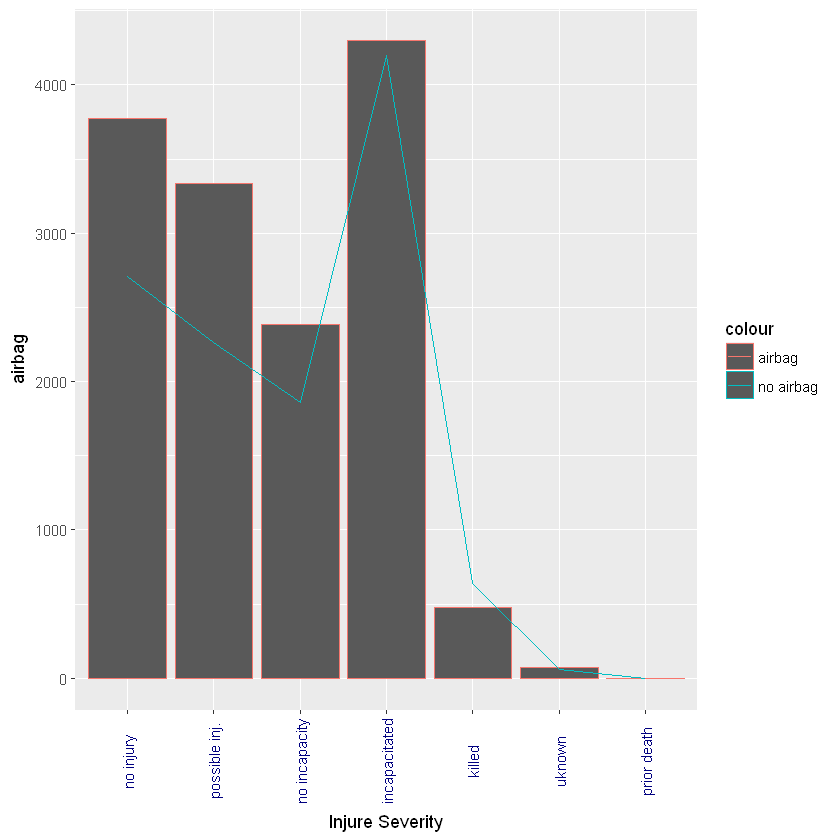

In [5]:
ggplot(ctt,aes(x=reorder(injureSeverity,injureSeverity)))+geom_bar(stat="identity",aes(y=airbag,colour="airbag"))+geom_line(aes(y=none,colour="no airbag"),group=1) +xlab("Injure Severity")+theme(axis.text.x = element_text(angle = 90, vjust = 0.5, color = "navy"))